In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import dash
import dash_html_components as html
import dash_core_components as dcc
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output, State

In [2]:
# apart_trading = pd.read_excel("아파트_매매가_상승_지수.xlsx",header=10) #엑셀의 11번째 행부터 읽어들인다.
# apart_trading.to_csv("아파트_매매가_상승_지수.csv",index=False,encoding='CP949') #CSV 파일로 전환 index행을 만들지 않기위해 False

In [2]:
apart_t = pd.read_csv('아파트_매매가_상승_지수.csv',encoding='CP949',header=[0,1]) #csv파일을 읽어온다. 

In [3]:
test = pd.read_csv('아파트_매매가_상승_지수.csv',encoding='CP949')#,index_col=[0,1,2,3])
test1=test.iloc[:,0:4]
test2=test.iloc[:,4:]
test2.columns = [[test2.columns[index-1] if index%2!=0 else i for index,i in enumerate(test2.columns)],[i for i in test2.iloc[0,:]]]
test2.drop(index=[0],inplace=True)
test2.reset_index(inplace=True)
test2.drop(columns='index',inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [3]:
[apart_t.rename(columns={apart_t.columns[index][0]:apart_t.columns[index-1][0]},inplace=True) for index,i in enumerate(apart_t.columns) if index%2!=0]
apart_t.drop(apart_t.columns[1:4],axis=1,inplace=True) # 1 ~ 3번째 열 삭제
apart_t.rename(columns={'Unnamed: 0_level_1':'지역'},inplace=True) # 지역으로 이름변경
apart_t.dropna(axis=0,inplace=True) #지역의 null값 행 모두 제거
apart_t.set_index('지 역',inplace=True) # 지역 인덱스화
apart_t.index = apart_t.index.map(lambda x : x[0]) #지역 인덱스 튜플값 풀어주기

apart_i = pd.DataFrame(apart_t.iloc[:,0::2].values,columns=apart_t.columns[0::2].map(lambda x : x[0])) #지수별로 데이터프레임 생성
apart_f = pd.DataFrame(apart_t.iloc[:,1::2].values,columns=apart_t.columns[0::2].map(lambda x : x[0])) #변동률별로 데이터프레임 생성
apart_i.set_index(apart_t.index,inplace=True) #인덱스를 지역명으로 지정
apart_f.set_index(apart_t.index,inplace=True) #

display(apart_t,apart_i,apart_f)

2014년 12월29일        2015년 01월05일        2015년 01월12일         \
                지수    변동률           지수    변동률           지수    변동률   
지 역                                                                 
전국          92.737   0.04       92.794   0.06       92.849   0.06   
수도권         89.151   0.04       89.206   0.06       89.257   0.06   
지방권         96.363   0.05       96.421   0.06        96.48   0.06   
6대광역시       91.733   0.06       91.788   0.06       91.854   0.07   
5대광역시       91.716   0.07       91.783   0.07       91.855   0.08   
9개도         95.696   0.04       95.759   0.07        95.82   0.06   
8개도        100.783   0.04      100.834   0.05       100.88   0.05   
서울          85.562   0.04       85.606   0.05       85.625   0.02   
경기          90.863   0.04       90.936   0.08        91.01   0.08   
인천          91.789   0.02       91.797   0.01       91.842   0.05   
부산          87.165   0.05       87.193   0.03       87.247   0.06   
대구          93.789   0.12       93.932   0.15       94.044   0.12   
광주          89.242   0.07       89.382   0.16        89.48   0.11   
대전          98.128   0.03       98.115  -0.01       98.164   0.05   
울산          96.615   0.03       96.633   0.02       96.675   0.04   
세종          95.966  -0.05       95.944  -0.02       95.911  -0.03   
강원          91.154   0.03       91.176   0.02       91.213   0.04   
충북          103.42   0.08      103.583   0.16      103.632   0.05   
충남         106.433  -0.02       106.48   0.04      106.564   0.08   
전북          97.479  -0.01       97.486   0.01       97.415  -0.07   
전남          93.381  -0.03       93.326  -0.06       93.231   -0.1   
경북         106.675   0.05      106.739   0.06      106.866   0.12   
경남         103.381   0.07      103.425   0.04      103.488   0.06   
제주          77.216   0.39       77.474   0.33       77.787    0.4   

      2015년 01월19일        2015년 01월26일         ... 2020년 11월30일        \
                지수    변동률           지수    변동률  ...           지수   변동률   
지 역                                            ...                      
전국          92.903   0.06       92.983   0.09  ...      103.774  0.24   
수도권         89.317   0.07       89.394   0.09  ...      110.038  0.16   
지방권         96.529   0.05       96.611   0.09  ...       98.088  0.31   
6대광역시       91.907   0.06       92.002    0.1  ...      105.703  0.38   
5대광역시       91.914   0.06       92.018   0.11  ...      104.992  0.44   
9개도         95.876   0.06       95.952   0.08  ...      100.758  0.22   
8개도         100.92   0.04      100.983   0.06  ...       91.299   0.2   
서울          85.679   0.06       85.745   0.08  ...      108.216  0.03   
경기          91.082   0.08       91.169    0.1  ...      111.244  0.24   
인천          91.871   0.03       91.933   0.07  ...      108.453  0.13   
부산          87.275   0.03       87.312   0.04  ...       97.913   0.5   
대구          94.168   0.13       94.365   0.21  ...      108.776  0.36   
광주           89.54   0.07       89.713   0.19  ...      104.861  0.18   
대전          98.201   0.04       98.237   0.04  ...      129.528   0.4   
울산          96.723   0.05       96.831   0.11  ...       92.295  0.83   
세종          95.896  -0.02       95.771  -0.13  ...      140.858  0.27   
강원          91.238   0.03       91.276   0.04  ...       90.087  0.09   
충북         103.789   0.15       103.86   0.07  ...       91.033  0.27   
충남         106.578   0.01      106.706   0.12  ...        94.81  0.25   
전북          97.419      0       97.388  -0.03  ...       95.584  0.12   
전남          93.135   -0.1       93.092  -0.05  ...      105.234  0.06   
경북         106.952   0.08      107.095   0.13  ...       87.528  0.12   
경남         103.522   0.03      103.585   0.06  ...       85.602  0.34   
제주          77.962   0.23       78.147   0.24  ...       93.351  0.01   

      2020년 12월07일       2020년 12월14일       2020년 12월21일       2020년 12월28일  \
                지수   변동률           지수   변동률           지수   변동률           지수   
지 역         

In [165]:
apart_t[apart_t.columns[0::2]].iloc[0,:].values #전국 월별 지수

array(['92.737', '92.794', '92.849', '92.903', '92.983', '93.074',
       '93.175', '93.29', '93.378', '93.497', '93.64', '93.78', '93.931',
       '94.099', '94.251', '94.41', '94.56', '94.676', '94.791', '94.904',
       '95.026', '95.156', '95.262', '95.378', '95.493', '95.617',
       '95.741', '95.839', '95.925', '96.034', '96.142', '96.241',
       '96.337', '96.431', '96.54', '96.641', '96.758', '96.876',
       '96.998', '97.113', '97.234', '97.366', '97.496', '97.626',
       '97.759', '97.868', '97.96', '98.04', '98.093', '98.142', '98.169',
       '98.181', '98.18', '98.183', '98.183', '98.18', '98.175', '98.174',
       '98.17', '98.163', '98.15', '98.142', '98.129', '98.116', '98.103',
       '98.093', '98.094', '98.097', '98.098', '98.104', '98.104',
       '98.107', '98.11', '98.114', '98.118', '98.119', '98.13', '98.145',
       '98.157', '98.169', '98.177', '98.196', '98.212', '98.226',
       '98.242', '98.255', '98.278', '98.306', '98.34', '98.376',
       '98.416', 

In [190]:
display(apart_t.columns[0::2].map(lambda x : x[0]))

Index(['2014년 12월29일', '2015년 01월05일', '2015년 01월12일', '2015년 01월19일',
       '2015년 01월26일', '2015년 02월02일', '2015년 02월09일', '2015년 02월16일',
       '2015년 02월23일', '2015년 03월02일',
       ...
       '2020년 10월26일', '2020년 11월02일', '2020년 11월09일', '2020년 11월16일',
       '2020년 11월23일', '2020년 11월30일', '2020년 12월07일', '2020년 12월14일',
       '2020년 12월21일', '2020년 12월28일'],
      dtype='object', length=313)

C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51068 missing from curre

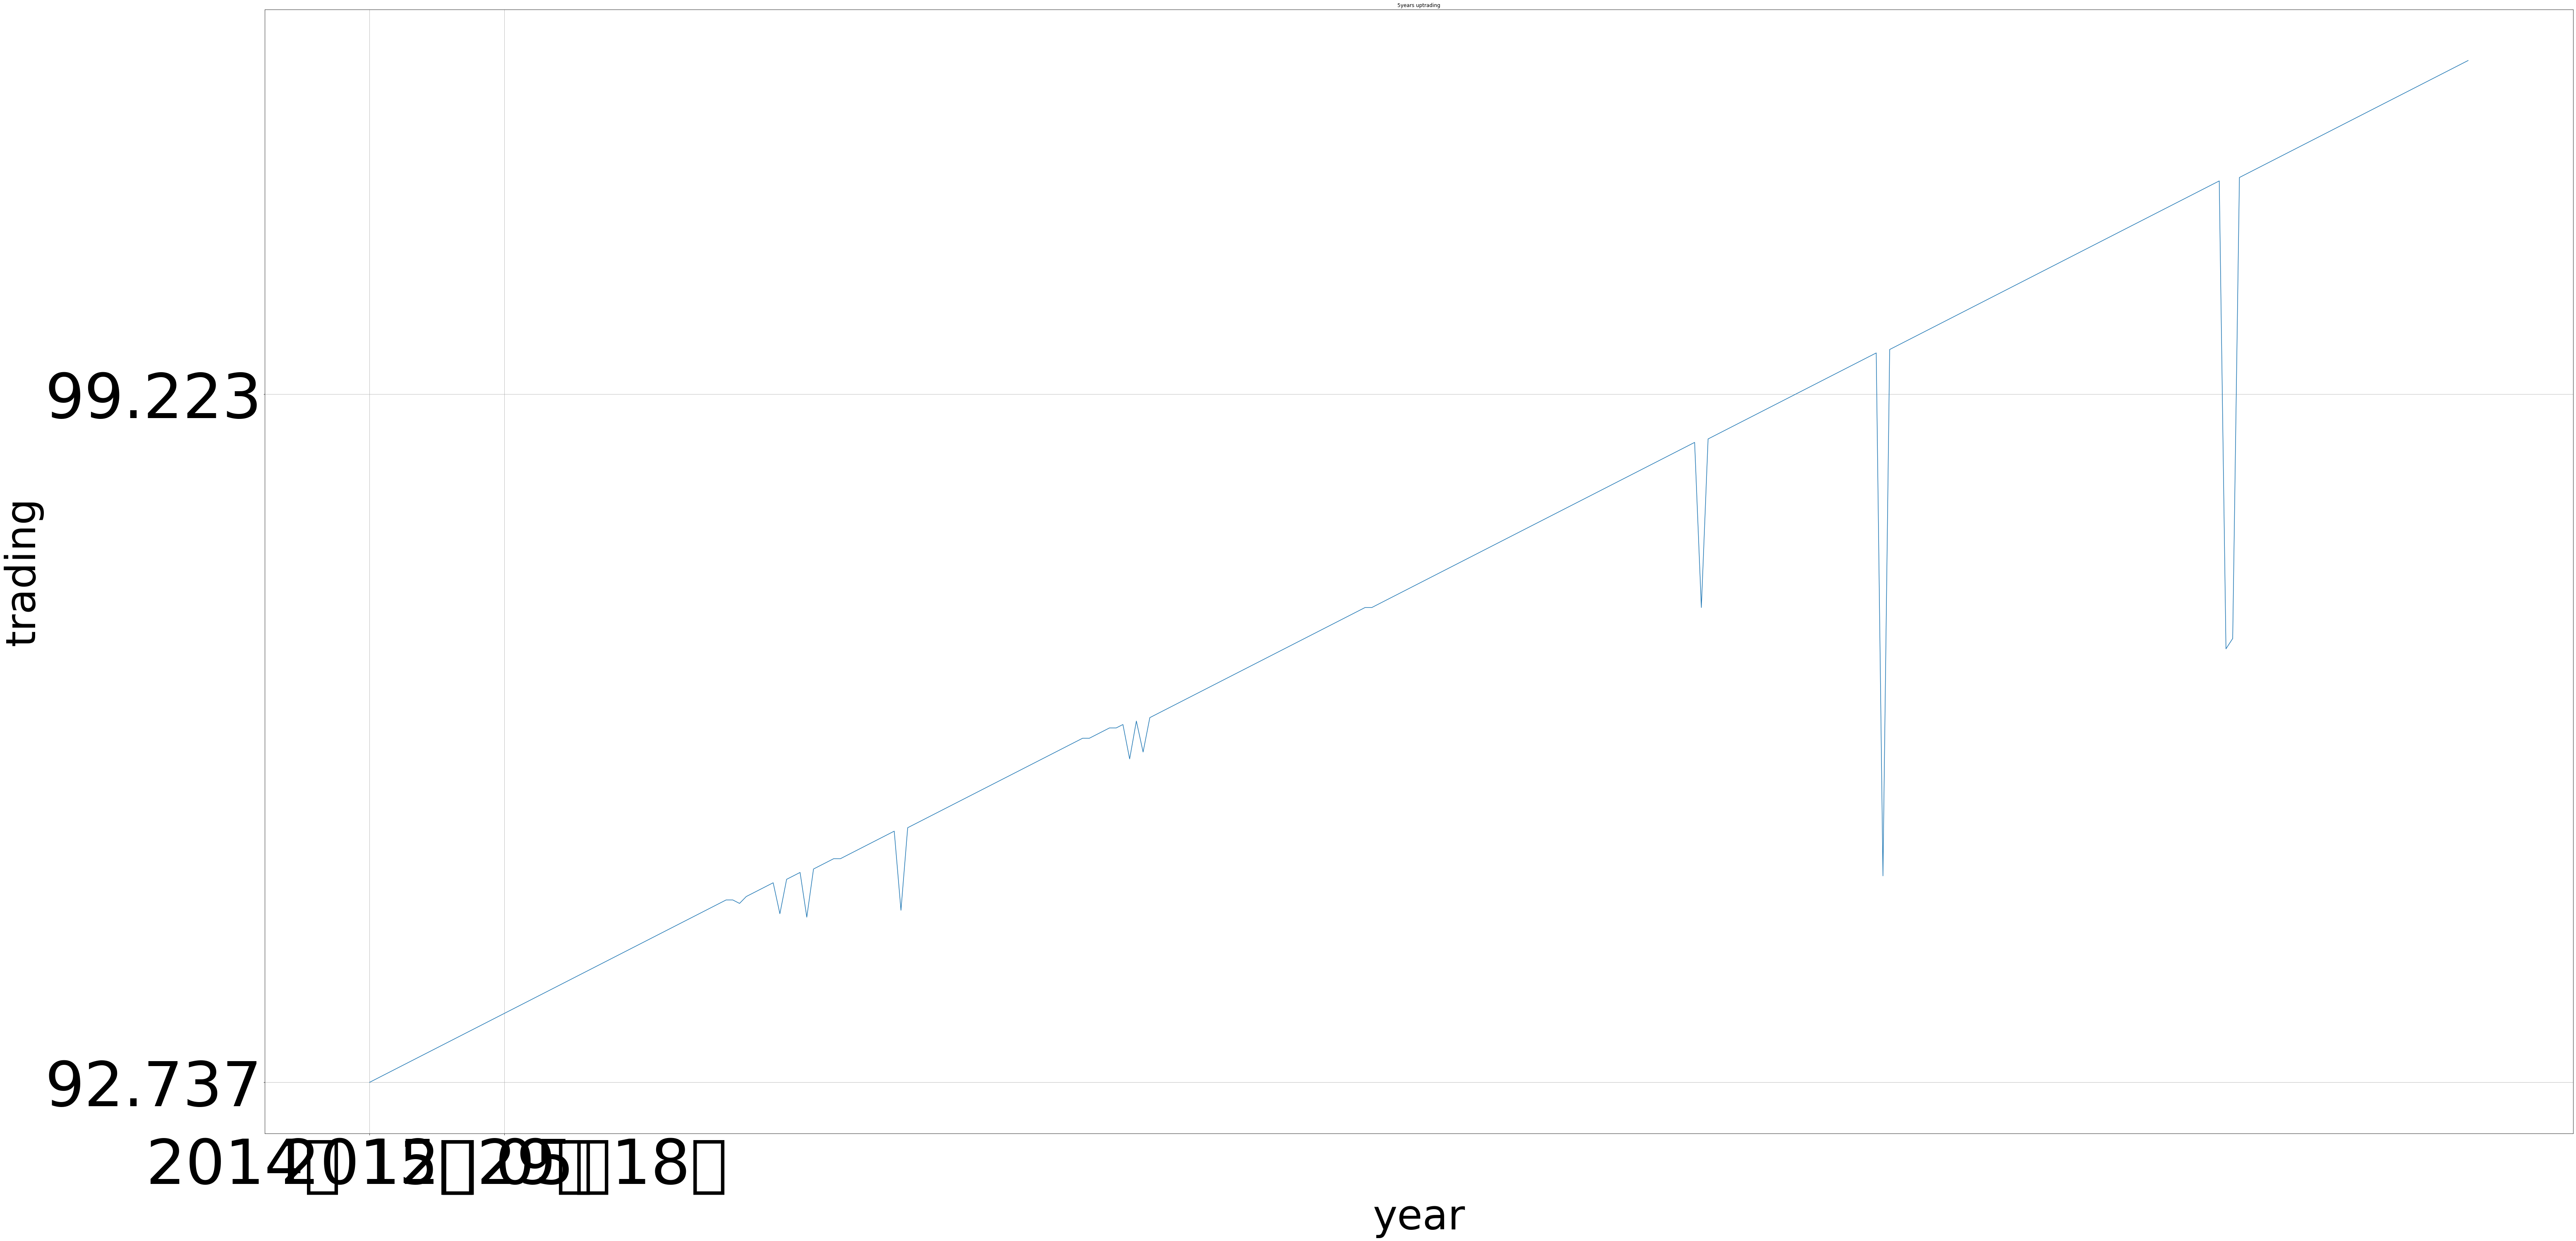

In [6]:
plt.figure(figsize=(100,50))

plt.plot(apart_t.columns[0::2].map(lambda x : x[0]),apart_t[apart_t.columns[0::2]].iloc[0,:].values)	# line 그래프를 그립니다
# plt.axis([0, 3, 0, 5])
plt.grid(True)
plt.xticks([0,20])
plt.yticks([0,200])
plt.rc('xtick', labelsize=150)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=150)  # y축 눈금 폰트 크기
plt.rc('axes', labelsize=100)   # x,y축 label 폰트 크기
plt.xlabel('year')
plt.ylabel('trading')
plt.title('5years uptrading')

plt.show()

In [ ]:
app = dash.Dash()
app.layout = html.Div(
    [
        html.Button('✌')
    ]
)
app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Jun/2021 15:30:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 15:30:04] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 15:30:04] "GET /_dash-dependencies HTTP/1.1" 200 -
